# Solving Differential Equations using Numerical Methods

## 1. Introduction

This notebook is an introductory class to how to solve differential equations using numerical simulations. It has been implemented using Julia running on  Jupyter labs. We start by defining our problem as an irreversible chemical reaction in the following form. 

$$ a + b \rightarrow c \tag{1}$$

where `a,b,c` are chemical species, and the rate or _speed_ of the reaction is determined by the reaction rate constant `k`. This value can be identified as the probability that a collision between `a` and `b` succesfully produces a molecule `c`.

Using both the __Mass Action Law__ and the __Mass Conservation Law__, we can derive the differential equations corresponding to this reaction. The general formulation of the system of differential equations can be expressed as:

$$ u' = f(u,p,t) \tag{2}$$

where `f` is a general vector function that depends on the parameters `p` of the system, the time variable `t`. Teh differentiatl equatios for this particular case have been dierived in the previous chapter. 

$$\begin{align}
\frac{da}{dt} &= -k \cdot a \cdot b \tag{3}\\
\frac{db}{dt} &= -k \cdot a \cdot b \tag{4}\\
\frac{dc}{dt} &= k \cdot a \cdot b \tag{5}
\end{align}$$


We will write the variables `a,b,c`  in the form of a __state vector__, i.e., a column vector that contains all the variable of the system variables. In this particular problem:

$$u=\begin{bmatrix}
a\\ 
b\\ 
c\tag{6}
\end{bmatrix}$$

## 2. Euler Method
The Euler method is the simplest most straightforward explicit algorithm to solve numerically a set differential equations. Althgough it is very simple, the Euler method often serves as the basis to construct more complex methods to solve systems of equations nukerically. Here, a differential equation can be thought of as a formula by which the slope of the tangent line to the curve can be computed at any point on the curve, once the position of that point has been calculated. The idea is that while the curve is initially unknown, its starting point (i.e., its in initial condition, which we denote by `u₀`), is know. Then, from the differential equation, the slope to the curve at `u₀` can be computed, and so, the tangent line.

<img src="Euler_method.png" width="200"/>

Take a small step along that tangent line up to a point `u1`. Along this small step, the slope does not change too much, so 
the point `u1` will be close to the curve. We can then continue the same reasoning for `u2`,`u3` and so on. 

Here we will learn how to implement this method on a computer using any programing language. This notebook has been designed using Julia. 


We start by defining a set of initial conditions for the state vector:

In [54]:
u₀=[0.02,0.01,0];

Next, we define a vector `time_span`, that determines the time where the equations will be solved

In [55]:
tspan = LinRange(0,100,100)

100-element LinRange{Float64}:
 0.0,1.0101,2.0202,3.0303,4.0404,…,95.9596,96.9697,97.9798,98.9899,100.0

The results will be saved in a matrix `U`. This matrix will be initialized with the same number of rows of the state vector `u`, and same number of columns equal to the time vector `tspan`.

In [56]:
U=zeros((size(u₀,1), size(tspan,1)));

The first row of the matrix `U` will be the state of the of the system at `t=0`, so it is equal to the vector of initial conditions `u0`:

In [57]:
U[:,1]=u₀;

Finally, we need to set a value for the kinetic rate constant $k$:

In [58]:
k=1;

We will use each row of the matrix to save the value of each variable `a,b,c` for each time point in the simulation `a=U[1], b=U[2], c=U[3]`. This way, the set of Eqs 2.3 will be solved iteratively, i.e., the value of `U(t-1)` will be used to calculate the value of `U(t)`. We will iterate as many times as the length of the time vector. We do this by using a `for` loop:

In [59]:
for i = 2:size(tspan,1)
           U[1,i]= U[1,i-1]-k*U[2,i-1]*U[1,i-1] # Eq 1
           U[2,i]= U[2,i-1]-k*U[2,i-1]*U[1,i-1] # Eq 2
           U[3,i]= U[3,i-1]+k*U[2,i-1]*U[1,i-1] # Eq 3
       end

Next, we rename each row as the corresponding variable and plot the results in a graph, with the x-axis as the time vector `tspan`, and the y-axis the concentration of each variable `a,b,c`:

In [60]:
a=U[1,:]
b=U[2,:]
c=U[3,:];

In [61]:
using Plots; gr(); # this is to initialize the plots package in Julia

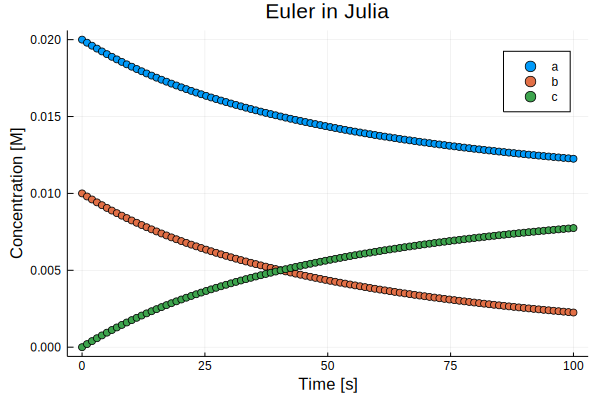

In [62]:
plot(tspan,a,label="a",seriestype=:scatter)
plot!(tspan,b,label="b",seriestype=:scatter)
plot!(tspan,c,label="c",seriestype=:scatter)
title!("Euler in Julia")
xlabel!("Time [s]")
ylabel!("Concentration [M]")

### <font color=red>Computer Exercise:</font> 

Solve numerically the case of reversible dimerization of the last class using the Euler method. Plot the dynamics of $X_1$ and $X_2$

In [63]:
k1=0.01
k2=0.0005
u₀1=1.0
u₀2=1.0
t₀=0.0
t_final=100

100

In [64]:
tspan = LinRange(0,t_final,t_final)
u₀_=[u₀1,u₀2];
U=zeros((size(u₀_,1), size(tspan,1)));
U[:,1]=u₀_;

In [65]:
for i = 2:size(tspan,1)
           U[1,i]= U[1,i-1]-k1*2*U[1,i-1]*U[1,i-1] + 2* k2* U[2,i-1] # Eq 1
           U[2,i]= U[2,i-1]+k1*U[1,i-1]*U[1,i-1] - k2* U[2,i-1] # Eq 2
       end

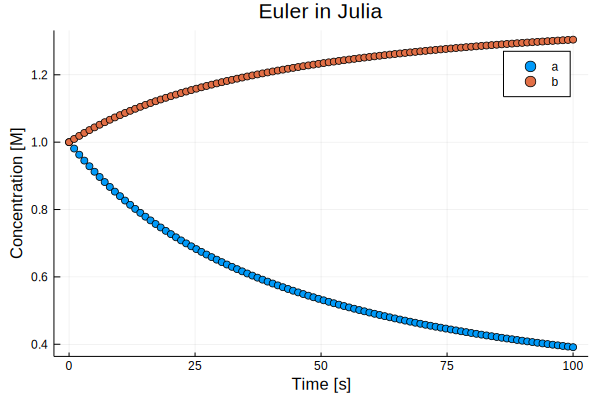

In [66]:
a=U[1,:]
b=U[2,:]
plot(tspan,a,label="a",seriestype=:scatter)
plot!(tspan,b,label="b",seriestype=:scatter)
title!("Euler in Julia")
xlabel!("Time [s]")
ylabel!("Concentration [M]")

In [67]:
using ParameterizedFunctions
using DifferentialEquations

In [68]:
function dimeriza!(du,u,p,t)
    k1,k2 = p
    du[1] = -2 * k1 *u[1] * u[1] + 2 * k2 * u[2]
    du[2] = k1 *u[1] * u[1] -  k2 * u[2]
end

dimeriza! (generic function with 1 method)

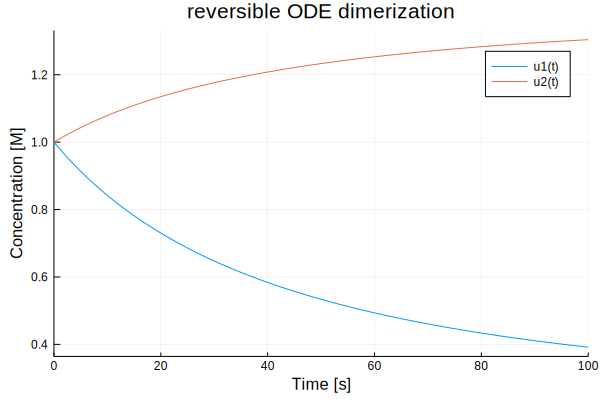

In [69]:
u₀=[u₀1,u₀2];
p = (k1,k2); # we could also make this an array, or any other type!
tspan = (t₀,t_final)
prob = ODEProblem(dimeriza!,u₀,tspan,p)
sol = solve(prob)
plot(sol)
title!("reversible ODE dimerization")
xlabel!("Time [s]")
ylabel!("Concentration [M]")

Now we use the ODE resulting from the Mass Conservation Law

In [70]:
function dimeriza2!(du,u,p,t)
    k1,k2,u₀1,u₀2= p
    du[1] = -2 * k1 *u[1] * u[1] + k2 * (u₀1+2*u₀2-u[1])
end

dimeriza2! (generic function with 1 method)

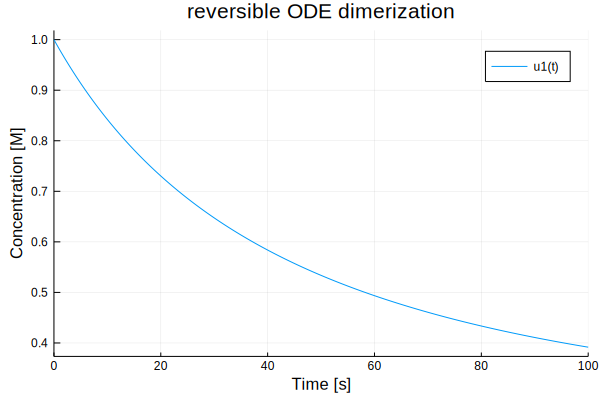

In [71]:
p = (k1,k2,u₀1,u₀2); # we could also make this an array, or any other type!
u₀=[u₀1];
prob = ODEProblem(dimeriza2!,u₀,tspan,p)
sol = solve(prob)
plot(sol)
title!("reversible ODE dimerization")
xlabel!("Time [s]")
ylabel!("Concentration [M]")

It is not an exponential, is a mix of a 1/x and an exponential 

## 3. Euler with integration step

The number of times that the equation is solved is very important. If we solved it just a few times, the solution may not be accurate. If you solve the system many times, the numerical simulations can be very slow. To  define how much time passes between diferent solutions of the system, we define a `timestep`. Note that now the `tspan` vector and the number of columns of the state matrix `U` depends on the `timestep` selected.

In [72]:
u₀=[0.02,0.01,0];
tspan = LinRange(0,100,100)
U=zeros((size(u₀,1), size(tspan,1)));
U[:,1]=u₀;
k=1;

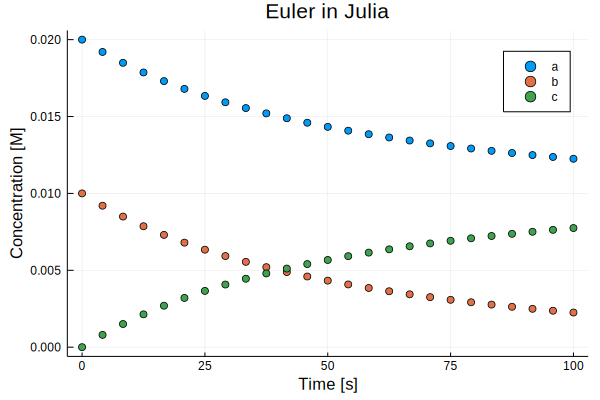

In [73]:
timestep=4
tspan=LinRange(0, 100, floor(Int,100/timestep))
U=zeros((size(u₀,1), size(tspan,1)))
U[:,1]=u₀
for i = 2:size(tspan,1)
           U[1,i]= U[1,i-1]-timestep*k*U[2,i-1]*U[1,i-1] # Eq 1
           U[2,i]= U[2,i-1]-timestep*k*U[2,i-1]*U[1,i-1] # Eq 2
           U[3,i]= U[3,i-1]+timestep*k*U[2,i-1]*U[1,i-1]  # Eq 3
       end
a=U[1,:]
b=U[2,:]
c=U[3,:]
plot(tspan,a,label="a",seriestype=:scatter)
plot!(tspan,b,label="b",seriestype=:scatter)
plot!(tspan,c,label="c",seriestype=:scatter)
title!("Euler in Julia")
xlabel!("Time [s]")
ylabel!("Concentration [M]")

### <font color=red>Computer Exercise:</font> 

Solve numerically the case of reversible dimerization of the last class using the Euler method. Plot the dynamics of $X_1$ and $X_2$. Find the time step that solves accurately the system with less iterations.

To compare how close are we to the analytical solutions, we can solve it and add it to the plot

In [74]:
#plot(tspan,(U[2,1]/U[1,1])*exp.(k.*tspan.*(U[2,1]-U[1,1])))

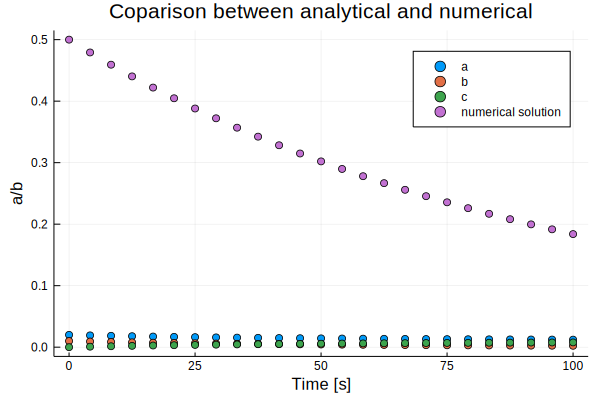

In [75]:
plot!(tspan,b./a,seriestype=:scatter,label="numerical solution")
title!("Coparison between analytical and numerical")
xlabel!("Time [s]")
ylabel!("a/b")

## 4. Differential equations solvers

Normally, each modern language has implemented solvers for dynamical systems in the form of differential equations. In Matlab the command is called ode23, in Python is ODEINT, In Julia, we first need to initialize the package for differenetial equations,

In [25]:
using DifferentialEquations

To take advantage of these solvers, we have to place the equations that result from the mass action analysis inside a vector function `f` that takes several input values. We use the same approximation of the state vector `u` used for the Euler method. Next we define a vector of parameters `p` with the kinetic rate constants of the interactions involved. In Julia:

In [26]:
function simpleODE1!(du,u,p,t)
    k = p
    du[1] = -k*u[1]*u[2]
    du[2] = -k*u[1]*u[2]
    du[3] = k*u[1]*u[2]   
end

simpleODE1! (generic function with 1 method)

Notice here we used the in-place format which writes the output to the preallocated vector ___du___. For systems of equations the in-place format is faster. We define a bector with the initial concentrations of the variables ___u₀___. For our model, the only parameter is the rate constant ___k___, therefore we build the parameter collection ___p___ as:

In [27]:
k=1;
p=(k);
u₀=[0.02,0.01,0];

Next, we define the ___tspan___ vector, which now it has only two components: the initial and final time point for the simulation

In [28]:
tspan = (0.0,100.0);

In JUlia, we need to define an __ODEProblem__ type using the constructor call. This is done by specifying this function ___simpleODE___, the initial condition ___u₀___, the time span ___tspan___ and the parameters  ___p___:

In [29]:
prob1 = ODEProblem(simpleODE1!,u₀,tspan,p)

ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 100.0)
u0: [0.02, 0.01, 0.0]

Now, we solve the problem:

In [30]:
sol1 = solve(prob1)

retcode: Success
Interpolation: Automatic order switching interpolation
t: 9-element Array{Float64,1}:
   0.0                
   0.15383356961677971
   1.6921692657845766 
   8.271878127162967  
  19.861899456477353  
  35.93005114214123   
  57.67420908286173   
  85.79247663851639   
 100.0                
u: 9-element Array{Array{Float64,1},1}:
 [0.02, 0.01, 0.0]                                                  
 [0.019969304122975096, 0.009969304122975095, 3.069587702490411e-5] 
 [0.019669951491554746, 0.009669951491554744, 0.000330048508445255] 
 [0.018528984102925104, 0.008528984102925104, 0.0014710158970748955]
 [0.01694717534030952, 0.006947175340309517, 0.0030528246596904824] 
 [0.015362930958335042, 0.00536293095833504, 0.004637069041664959]  
 [0.01390556709447361, 0.0039055670944736086, 0.006094432905526391] 
 [0.012690713519441801, 0.0026907135194418003, 0.007309286480558199]
 [0.012254018453930423, 0.0022540184539304223, 0.007745981546069577]

`sol1.t` stores the time points and `sol1.u` is an array storing the solution at the corresponding time points. 

However, when dealing with systems of equations, `sol1` also acts like an array. `sol1[i]` returns the solution at the `i`th time point.

In [31]:
sol1.t[3],sol1.u[3]

(1.6921692657845766, [0.019669951491554746, 0.009669951491554744, 0.000330048508445255])

Additionally, the solution acts like a matrix where `sol[j,i]` is the value of the `j`th variable at time `i`:

In [32]:
sol1[:,3]

3-element Array{Float64,1}:
 0.019669951491554746
 0.009669951491554744
 0.000330048508445255

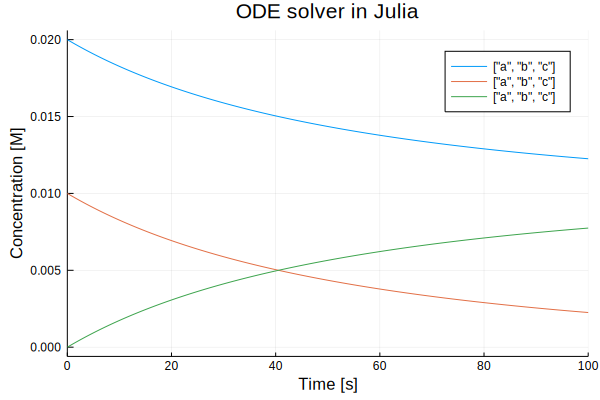

In [33]:
plot(sol1,label=["a","b","c"])
title!("ODE solver in Julia")
xlabel!("Time [s]")
ylabel!("Concentration [M]")

One interesting feature is that, by default, the solution is a continuous function. So you do not need to extrapolate to a curve

In [34]:
sol1(60.4)

3-element Array{Float64,1}:
 0.013761040162694377
 0.003761040162694375
 0.006238959837305625

We can see how the implemented ODE solver chooses the time variable depending of the stiffness of the solution of the ODE. This saves a lot of time and computer power. Quite often, each ODE solver handles the integration time diferently, and choosing one or the other is impontant and depends on the problem to solve. We can see that the stock solver in Julia only solves the following few points

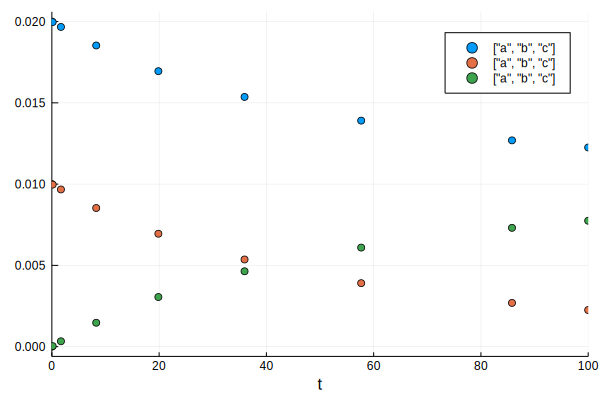

In [35]:
sol1 = solve(prob1,dense=false)
plot(sol1,label=["a","b","c"],seriestype=:scatter)

### 5.1 A DSL for Parameterized Functions

In many cases you may be defining a lot of functions with parameters. There exists the domain-specific language (DSL) defined by the `@ode_def` macro for helping with this common problem. Using this feature in Julia, we can rewrite the `simpleODE!` function as:

In [36]:
using ParameterizedFunctions

In [37]:
simpleODE3! = @ode_def abetterway begin
  da = -k*a*b
  db = -k*a*b
  dc = k*a*b
    end k

(::abetterway{var"#3#7",var"#4#8",var"#5#9",Nothing,Nothing,var"#6#10",Expr,Expr}) (generic function with 2 methods)

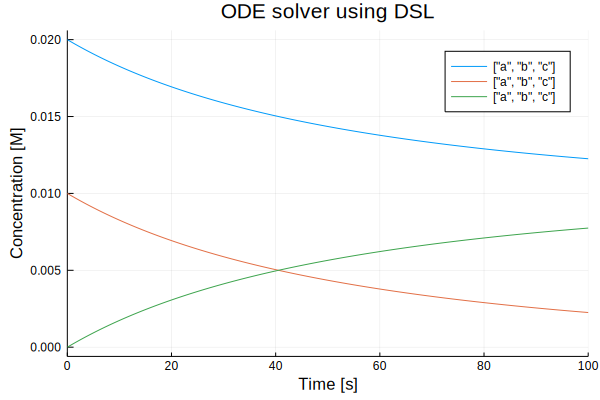

In [38]:
prob3 = ODEProblem(simpleODE3!,u₀,tspan,p)
sol3 = solve(prob3)
plot(sol3,label=["a","b","c"])
title!("ODE solver using DSL")
xlabel!("Time [s]")
ylabel!("Concentration [M]")

## 5. Reversible reactions and equilibrium 

Now we will use the same approach  to solve the reversible reaction 

$$ a + b \overset{k_1}{\underset{k_2}{\longleftrightarrow}} c \tag{7}$$

with rate constants `k1`, and `k2` for the forward and reverse reaction, and with initial concentrations $X_1(0)$, $X_2(0)$ and $X_3(0)$. The stoichometric matrices are

$$
A=\begin{bmatrix}
 1 & 1 & 0 \\  0 & 0 & 1 \end{bmatrix} ;
B=\begin{bmatrix}
0 & 0 & 1  \\
1 & 1 & 0 
\end{bmatrix} ; \tag{8}
$$

In [39]:
A=[1 1 0 ; 0 0 1]
B=[0 0 1 ; 1 1 0]
stoichiometric_matrix= (B-A)'
println("The stoichiometric matrix is $stoichiometric_matrix ")

The stoichiometric matrix is [-1 1; -1 1; 1 -1] 


 in this particular case

$$
K=\begin{pmatrix}
 k_1 & 0   \tag{9}\\ 
 0 &  k_2  \\ 
\end{pmatrix}
$$

and 

and 

$$X^A=\begin{pmatrix}
X_1^1\cdot X_2^1 \cdot X_3^0\\
X_1^0\cdot X_2^0 \cdot X_3^1
\end{pmatrix} = \begin{pmatrix}
X_1 \cdot X_2 \\
X_3
\end{pmatrix} \tag{10}
$$

$$
\begin{align}
 \begin{bmatrix}
\frac{\mathrm{d} X_1}{\mathrm{d} t}\\ \frac{\mathrm{d} X_2}{\mathrm{d} t} \\ \frac{\mathrm{d} X_3}{\mathrm{d} t} 
\end{bmatrix}&=  \begin{bmatrix}
 - 1  & 1 \\ -1  & 1 \\ 1 & -1\end{bmatrix} \begin{bmatrix}
k_1 & 0\\ 
 0& k_2
\end{bmatrix}\begin{pmatrix}
X_1 \cdot X_2 \\
X_3
\end{pmatrix} = \begin{bmatrix}
 - 1  & 1 \\ -1  & 1 \\ 1 & -1\end{bmatrix}\begin{pmatrix}
 k_1 \cdot X_1 \cdot X_2 \\
k_2 \cdot X_3
\end{pmatrix} \tag{11}
\end{align}
$$

Multiplying and substituting for the original names of the variables, we have the set of differential equations. 

$$ \frac{da}{dt} = -k_1 \cdot a \cdot b + k_2 \cdot c \tag{12}$$

$$ \frac{db}{dt} = -k_1 \cdot a \cdot b + k_2 \cdot \tag{13}c$$

$$ \frac{dc}{dt} = k_1 \cdot a \cdot b - k_2 \cdot \tag{14}c$$



To use the ode solver, $p$ now holds the two parameters required to solve the system, $k_1$, and $k_2$. So

In [40]:
k1=1
k2=0.01
p = (k1,k2); # we could also make this an array, or any other type!

In [41]:
function simpleODErev!(du,u,p,t)
    k1,k2 = p
    du[1] = -k1*u[1]*u[2]+k2*u[3]
    du[2] = -k1*u[1]*u[2]+k2*u[3]
    du[3] = k1*u[1]*u[2]-k2*u[3] 
end

simpleODErev! (generic function with 1 method)

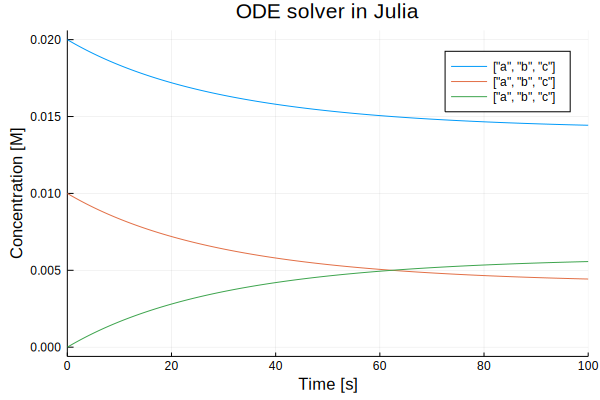

In [42]:
prob4 = ODEProblem(simpleODErev!,u₀,tspan,p)
sol4 = solve(prob4)
plot(sol4,label=["a","b","c"])
title!("ODE solver in Julia")
xlabel!("Time [s]")
ylabel!("Concentration [M]")

or, using the DSL notation avaliable in Julia

In [43]:
simpleODE2_rev! = @ode_def abetterway begin
  da = -k1*a*b+k2*c
  db = -k1*a*b+k2*c
  dc = k1*a*b-k2*c
    end k1 k2

(::abetterway{var"#11#15",var"#12#16",var"#13#17",Nothing,Nothing,var"#14#18",Expr,Expr}) (generic function with 2 methods)

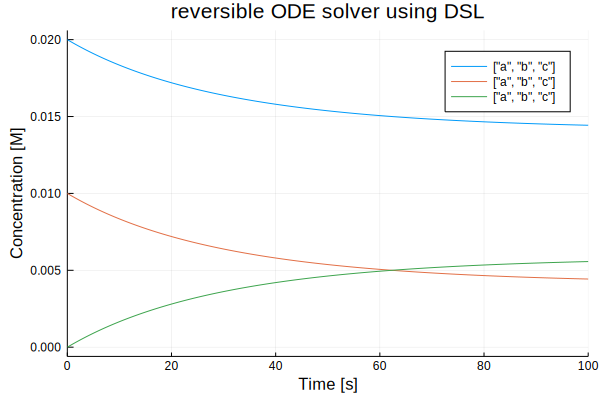

In [44]:
tspan = (0.0,100.0)
prob = ODEProblem(simpleODE2_rev!,u₀,tspan,p)
sol = solve(prob)
plot(sol,label=["a","b","c"])
title!("reversible ODE solver using DSL")
xlabel!("Time [s]")
ylabel!("Concentration [M]")

Now instead of using the Mass Conservation to reduce the number of variables, we will practice another method to simplify the system. For instance, one of teh things that we can do when we have the differential equations of a system is to find the values at equilibrium. Since we already know that the equilibrium is reached when the speed of the reaction is zero, we have $ \frac{\mathrm{d} c_{eq}}{\mathrm{d} t}=0$, we have:

$$
\begin{align}
k_2 \cdot c_{eq}= k_1 \cdot a_{eq}\cdot b_{eq} \tag{15}\\
c_{eq}= \frac{k_1 \cdot a_{eq}\cdot b_{eq}}{k_2} \tag{16}
\end{align}
$$

In addition, based on the restrictions imposed by the Mass conservation, since  $ \frac{\mathrm{d} c}{\mathrm{d} t}=-\frac{\mathrm{d} a}{\mathrm{d} t} $ at any time, the condition $[a]+[c]=[a_o]$ is true at all time points. thererefore we can rewrite the equilibrium equation as:


$$
\begin{align}
c_{eq}= \frac{k_1 \cdot (a_{0}-c_{eq})\cdot b_{eq}}{k_2} \tag{17}\\
c_{eq}= \frac{k_1 \cdot a_{0}\cdot b_{eq}}{k_2}-\frac{k_1 \cdot c_{eq}\cdot b_{eq}}{k_2}  \tag{18}\\
c_{eq}+\frac{k_1 \cdot c_{eq}\cdot b_{eq}}{k_2} = \frac{k_1 \cdot a_{0}\cdot b_{eq}}{k_2} \tag{19}\\
c_{eq}(1+\frac{k_1 \cdot b_{eq}}{k_2}) = \frac{k_1 \cdot a_{0}\cdot b_{eq}}{k_2} \tag{20}\\
c_{eq}(\frac{k_2+k_1 \cdot b_{eq}}{k_2}) = \frac{k_1 \cdot a_{0}\cdot b_{eq}}{k_2} \tag{21}\\
c_{eq}= \frac{k_1 \cdot a_{0}\cdot b_{eq}}{k_2+k_1 \cdot b_{eq}} \tag{22}\\
\end{align}
$$

so, divinding numerator and denominator by $k_1$
$$
\begin{align}
c_{eq}= \frac{a_{0}\cdot b_{eq}}{\frac{k_2}{k_1}+\cdot b_{eq}} \tag{23}\\
c_{eq}= \frac{a_{0}\cdot b_{eq}}{K_{eq}+\cdot b_{eq}} \tag{24}
\end{align}
$$


where $K_{eq}$ is the equilibirum constant, defined as:


\begin{equation}
K_{eq}=\frac{k_2}{k_1} \tag{25}
\end{equation}

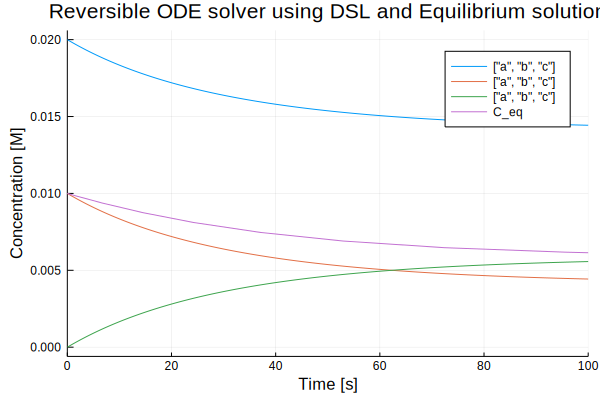

In [45]:
B=sol4[2,:]
c_eq=B*u₀[1]./(B.+(k2/k1))
plot(sol4,label=["a","b","c"])
plot!(sol4.t,c_eq,label="C_eq")
title!("Reversible ODE solver using DSL and Equilibrium solution")
xlabel!("Time [s]")
ylabel!("Concentration [M]")

We see that the value predicted for variable $c_{eq}$ at equilibrium it gets closer to the real value as we approach the equilibrium. So it is only a good approximation after 90 seconds or so. This approximation will be used later on the course when we combine reactions that are fast with reactions that are slow. In these conditions, we can assume that one of the reactions (the fast one) is allways at equilibirum, so one of teh variables is almost constant, allowing us to simplify the system. 

## 6. Conclusion

The combination of the differential form of Mass Action and the Mass conservation form a very powerfull tandem to derive and simplify the ODEs that govern the dynamcis of any system of interacting species. 

### <font color=red>Computer Task:</font> 

Solve numerically the following reversible reaction using a solver from the programming language of your preference (you may need to write your code as separate  functions). Use the Mass Conservation Law to simplify the system (only three ODEs)

$$ NaCO_3 + CaCl_2  \overset{k_1}{\underset{k_2}{\longleftrightarrow}}  CaCO_3 + 2 NaCl $$

Rename the reactants for simplicity ($a = NaCO_3$, $b  =CaCl_2$, $c  = CaCo_3$, $d = NaCl)$. Use the following values

In [46]:
k1=2.3e0;  # units 1/(Ms)
k2=2.5e0;  # units 1/(M M s)
a₀=0.02; # units (M)
b₀=0.01; # units (M)
c₀=0; # units (M)
d₀=0; # units (M)

### Solution of Task 2


$$\begin{align} 
 a + b  &\overset{k_1}{\longrightarrow}  c + 2 d \tag{25}\\
 c + 2 d &\overset{k_2}{\longrightarrow} a + b \tag{26}
 \end{align}
$$

we have calculated already the differential equations based on Mass Action Kinetics,which gives us a system of four coupled ODEs:

$$\begin{align}        
            \frac{ da }{dt} &= - k_1 \cdot a \cdot b + k_2 \cdot c \cdot d^2  \tag{29}\\ 
            \frac{ db }{dt} &= - k_1 \cdot a \cdot b + k_2 \cdot c \cdot d^2   \tag{30}  \\
             \frac{ dc }{dt} &=  k_1 \cdot a \cdot b - k_2 \cdot c \cdot d^2  \tag{31}  \\
              \frac{ dd }{dt} &= 2 k_1 \cdot a  \cdot b - 2 k_2 \cdot c \cdot d^2   \tag{32}  \\
\end{align}
$$

Next, we solve the equations numerically:

In [47]:
simpleODE3! = @ode_def abetterway begin
  da = -k1 * a * b + k2 * c * d^2
  db = -k1 * a * b + k2 * c * d^2
  dc = k1 * a * b - k2 * c * d^2
  dd = 2 * k1 * a * b - 2 * k2 * c * d^2
    end k1 k2

(::abetterway{var"#19#23",var"#20#24",var"#21#25",Nothing,Nothing,var"#22#26",Expr,Expr}) (generic function with 2 methods)

In [76]:
k1=2.3e0;  # units 1/(Ms)
k2=2.5e0;  # units 1/(M M s)

p = (k1,k2)

a₀=0.02; # units (M)
b₀=0.01; # units (M)
c₀=0; # units (M)
d₀=0; # units (M)

u₀=[a₀,b₀,c₀,d₀];

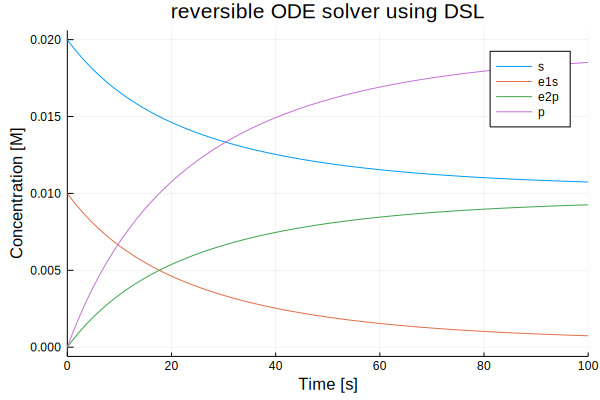

In [77]:
tspan = (0.0,100.0)
prob = ODEProblem(simpleODE3!,u₀,tspan,p)
sol = solve(prob)
plot(sol,label=["s" "e1s" "e2p" "p"])
title!("reversible ODE solver using DSL")
xlabel!("Time [s]")
ylabel!("Concentration [M]")

We will now take advantage of the Mass Conservation law to reduce the numbre of equations of the system. Based on the previous analysis, we calculated the coefficients of the vector $C \cdot (B-A)^T =0$, obatining the following relation between the variables. 

$$
\begin{align}
 a(t) + b(t)+ c(t)+\frac{d(t)}{2}= cte 
\end{align}
$$

Since this is valid for every time, we can write:
$$
\begin{align}
  a(t) + b(t)+ c(t)+\frac{d(t)}{2}= cte= a(0) + b(0)+ c(0)+\frac{d(0)}{2} 
\end{align}
$$
so we can eliminate one of the variables, for instance $c$ :
$$
\begin{align}
  c(t)= a(0) + b(0) + c(0) + \frac{d(0)}{2} - a(t) - b(t) - \frac{d(t)}{2} = cte - a(t) - b(t) - \frac{d(t)}{2}
\end{align}
$$

and only solve a system of three equations, 



$$\begin{align}        
            \frac{ da }{dt} &= - k_1 \cdot a \cdot b + k_2  (cte - a - b - \frac{d}{2})  d^2 \\ 
            \frac{ db }{dt} &= - k_1 \cdot a \cdot b + k_2 (cte - a - b - \frac{d}{2}) d^2  \\
              \frac{ dd }{dt} &= 2 k_1 \cdot a  \cdot b - 2 k_2 (cte - a - b - \frac{d}{2}) d^2
\end{align}
$$



In [78]:
simpleODE4! = @ode_def abetterway begin
  da = -k1 * a * b + k2 * (cte - a - b - d/2) * d^2
  db = -k1 * a * b + k2 * (cte - a - b - d/2) * d^2
  dd = 2 * k1 * a * b - 2 * k2 * (cte - a - b - d/2) * d^2
    end k1 k2 cte

(::abetterway{var"#35#39",var"#36#40",var"#37#41",Nothing,Nothing,var"#38#42",Expr,Expr}) (generic function with 2 methods)

In [81]:
k1=2.3e0;  # units 1/(Ms)
k2=2.5e0;  # units 1/(M M s)

a₀=0.02; # units (M)
b₀=0.01; # units (M)
c₀=0; # units (M)
d₀=0; # units (M)

cte=a₀+b₀+c₀+d₀/2
p = (k1,k2,cte)
u₀=[a₀,b₀,d₀];

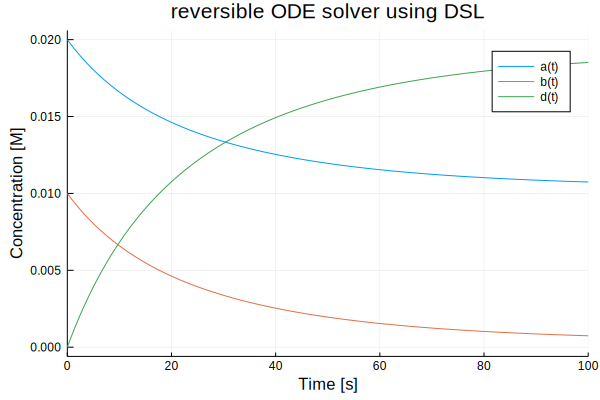

In [82]:
tspan = (0.0,100.0)
prob = ODEProblem(simpleODE4!,u₀,tspan,p)
sol = solve(prob)
plot(sol)
title!("reversible ODE solver using DSL")
xlabel!("Time [s]")
ylabel!("Concentration [M]")

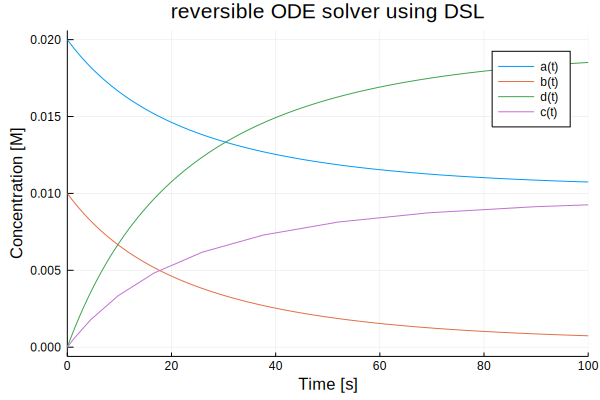

In [83]:
plot!(sol.t,a₀.+b₀.+c₀.+(d₀./2).-(sol[1,:].+sol[2,:].+(sol[3,:]./2)),label="c(t)")